In [1]:
# 2

def q_z(x, y):
    return (x - 2 * y - 3) / (x ** 2 + 3 * y ** 2 + 1)

In [342]:
def q_sum_z(Z): return sum(Z)

In [343]:
def exchange_scheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]

    X[0] = oldX[sortedId[0]]
    X[1] = oldX[sortedId[1]]

    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]

    Y[2] = oldY[sortedId[0]]
    Y[3] = oldY[sortedId[1]]

    return X, Y

In [344]:
def sorting(Z):
    sorted_id = sorted(range(len(Z)), key = lambda k: Z[k])

    return sorted_id

In [345]:
def evo_step(X, Y, Z):
    _, min_id = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]


    X.pop(min_id)
    Y.pop(min_id)
    Z.pop(min_id)

    return X, Y, Z

In [346]:
def evo_steps(X, Y, steps_num):
    results = []

    for i in range(steps_num):
        arr_z = [q_z(x, Y[i]) for i, x in enumerate(X)]

        X, Y, Z = evo_step(X, Y, arr_z)
        X, Y = exchange_scheme(X, Y, sorting(Z))
        results.append([X, Y, q_sum_z(arr_z), arr_z])

    return X, Y, results

In [347]:
X= [-4, -2, 0, 2]
Y = [-1, 1, 0, -2]

In [348]:
results = evo_steps(X, Y, 4)

In [349]:
for i in range(len(results[2])):
    print(f'max_{ i + 1 }_step: {results[2][i][2]}')

quality_arrz = []
for i in range(len(results[2])):
    quality_arrz += results[2][i][3]

print(f'max Z: { max(quality_arrz) }')

max_1_step: -3.948529411764706
max_2_step: -0.41227180527383367
max_3_step: -0.2720588235294117
max_4_step: 0.37449290060851925
max Z: 0.17647058823529413


In [350]:
# 2

import networkx as nx
from math import e

In [351]:
distances = [(1, 2, 25),
             (1, 3, 41),
             (1, 4, 38),
             (1, 5, 27),
             (1, 6, 20),
             (2, 3, 21),
             (2, 4, 34),
             (2, 5, 39),
             (2, 6, 17),
             (3, 4, 24),
             (3, 5, 40),
             (3, 6, 22),
             (4, 5, 21),
             (4, 6, 21),
             (5, 6, 22)]

V = [1, 3, 5, 4, 6, 2, 1]

Z = [(3, 4),
     (4, 5),
     (5, 2),
     (6, 2)]

P = [41, 60, 85, 60]

T = 100

In [352]:
def probability(delta, T):
    return 100 * e ** (-delta / T)

def reduct_temp(prev_t):
    next_t = 0.5 * prev_t

    return next_t

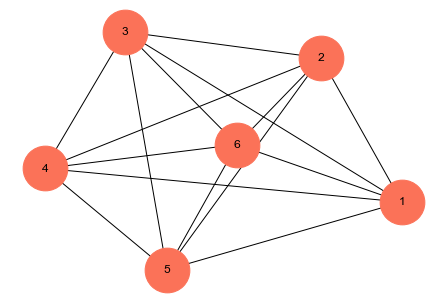

In [353]:
graph = nx.Graph()
graph.add_weighted_edges_from(distances)

nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

In [354]:
def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or(item[1] == i and item[0] ==j) else -1)

                             for item in distances])

    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

In [355]:
def routeLength(V, distances):
    edges = []

    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))

    return sum(edges)

In [356]:
def routeOneReplacement(arrV, Z, replacementByName = True,):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV

In [357]:
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

In [358]:
def chooseRoute(distances, V, Z, T, P ):
    sumLenght = routeLength(V, distances)
    arrSum = [sumLenght]

    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLenght

        if deltaS > 0:
            p = probability(deltaS, T)

            if p > P[i]:
                V = newV
                sumLenght = newS
        else:
            V = newV
            sumLenght = newS
        T = reductTemp(T)

    return V, arrSum



In [359]:
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] ==bestRoute[i] and distance[0] ==bestRoute[i + 1]:
                newDistances.append(distance)



    graph = nx.Graph()

    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

Лучший выбранный маршрут [1, 5, 4, 6, 3, 2, 1]
Длинна лучшего выбранного маршрута: 137
Длины всех рассмотренных маршрутов: [165, 150, 172, 137, 169]


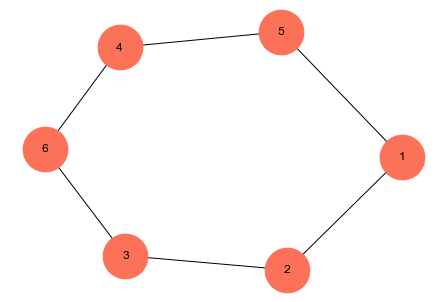

In [360]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут {bestRoute}')
print(f'Длинна лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute)